In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
# Define functions
def f(p):
    return p - p**3

def df(p):
    return 1 - 3*p**2

In [12]:
def Godunov(U0,nu,f,Nsteps):
    U = np.zeros((len(U0),Nsteps+1))
    U[:,0] = U0
    for n in range(Nsteps):
        # F values F(Uj,Uj+1)
        F = np.zeros(len(U[:,n]))
        UR = np.roll(U[:,n],-1)
        UR[-1] = U[-1,n]
        for j in range(len(U[:,n])):
            uL = U[j,n]
            uR = UR[j]
            if uL <= uR:
                if uL < -1/np.sqrt(3) and uR > -1/np.sqrt(3):
                    F[j] = f(-1/np.sqrt(3))
                else:
                    F[j] = min(f(uL),f(uR))
            else:
                if uR < 1/np.sqrt(3) and uL > 1/np.sqrt(3):
                    F[j] = f(1/np.sqrt(3))
                else:
                    F[j] = max(f(uL),f(uR))
        temp = np.roll(F,1)
        temp[0] = f(U[0,n])
        U[:,n+1] = U[:,n] - nu*(F - temp)
#         U[:,n+1] = U[:,n] - nu*(F - np.roll(F,1))

    return U

In [4]:
Tb = 1 / (0.48 + 3.84)
print(Tb)

0.23148148148148145


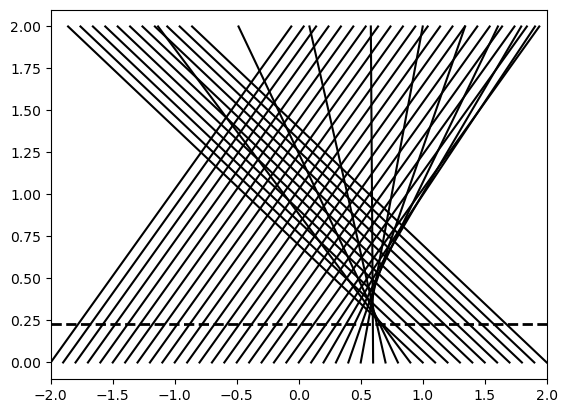

In [5]:
p0 = lambda x: 0.1*(x<0) + (0.1+0.8*x)*(x>=0)*(x<=1) + 0.9*(x>1)

plt.figure()
for x0 in np.linspace(-2, 2, 41):
    slope = df(p0(x0))
    plt.plot([x0, x0 + slope * 2], [0, 2], 'k')

plt.plot([-2, 2], [Tb, Tb], 'k--', linewidth=2)
plt.xlim([-2, 2])
plt.show()

In [6]:
s = (f(0.1) - f(0.9)) / (0.1 - 0.9)
print(s)

0.0899999999999999


t = 0 True
t = 1 True
t = 2 True
t = 3 True
t = 4 True
t = 5 True
t = 6 True
t = 7 True
t = 8 True
t = 9 True
t = 10 True


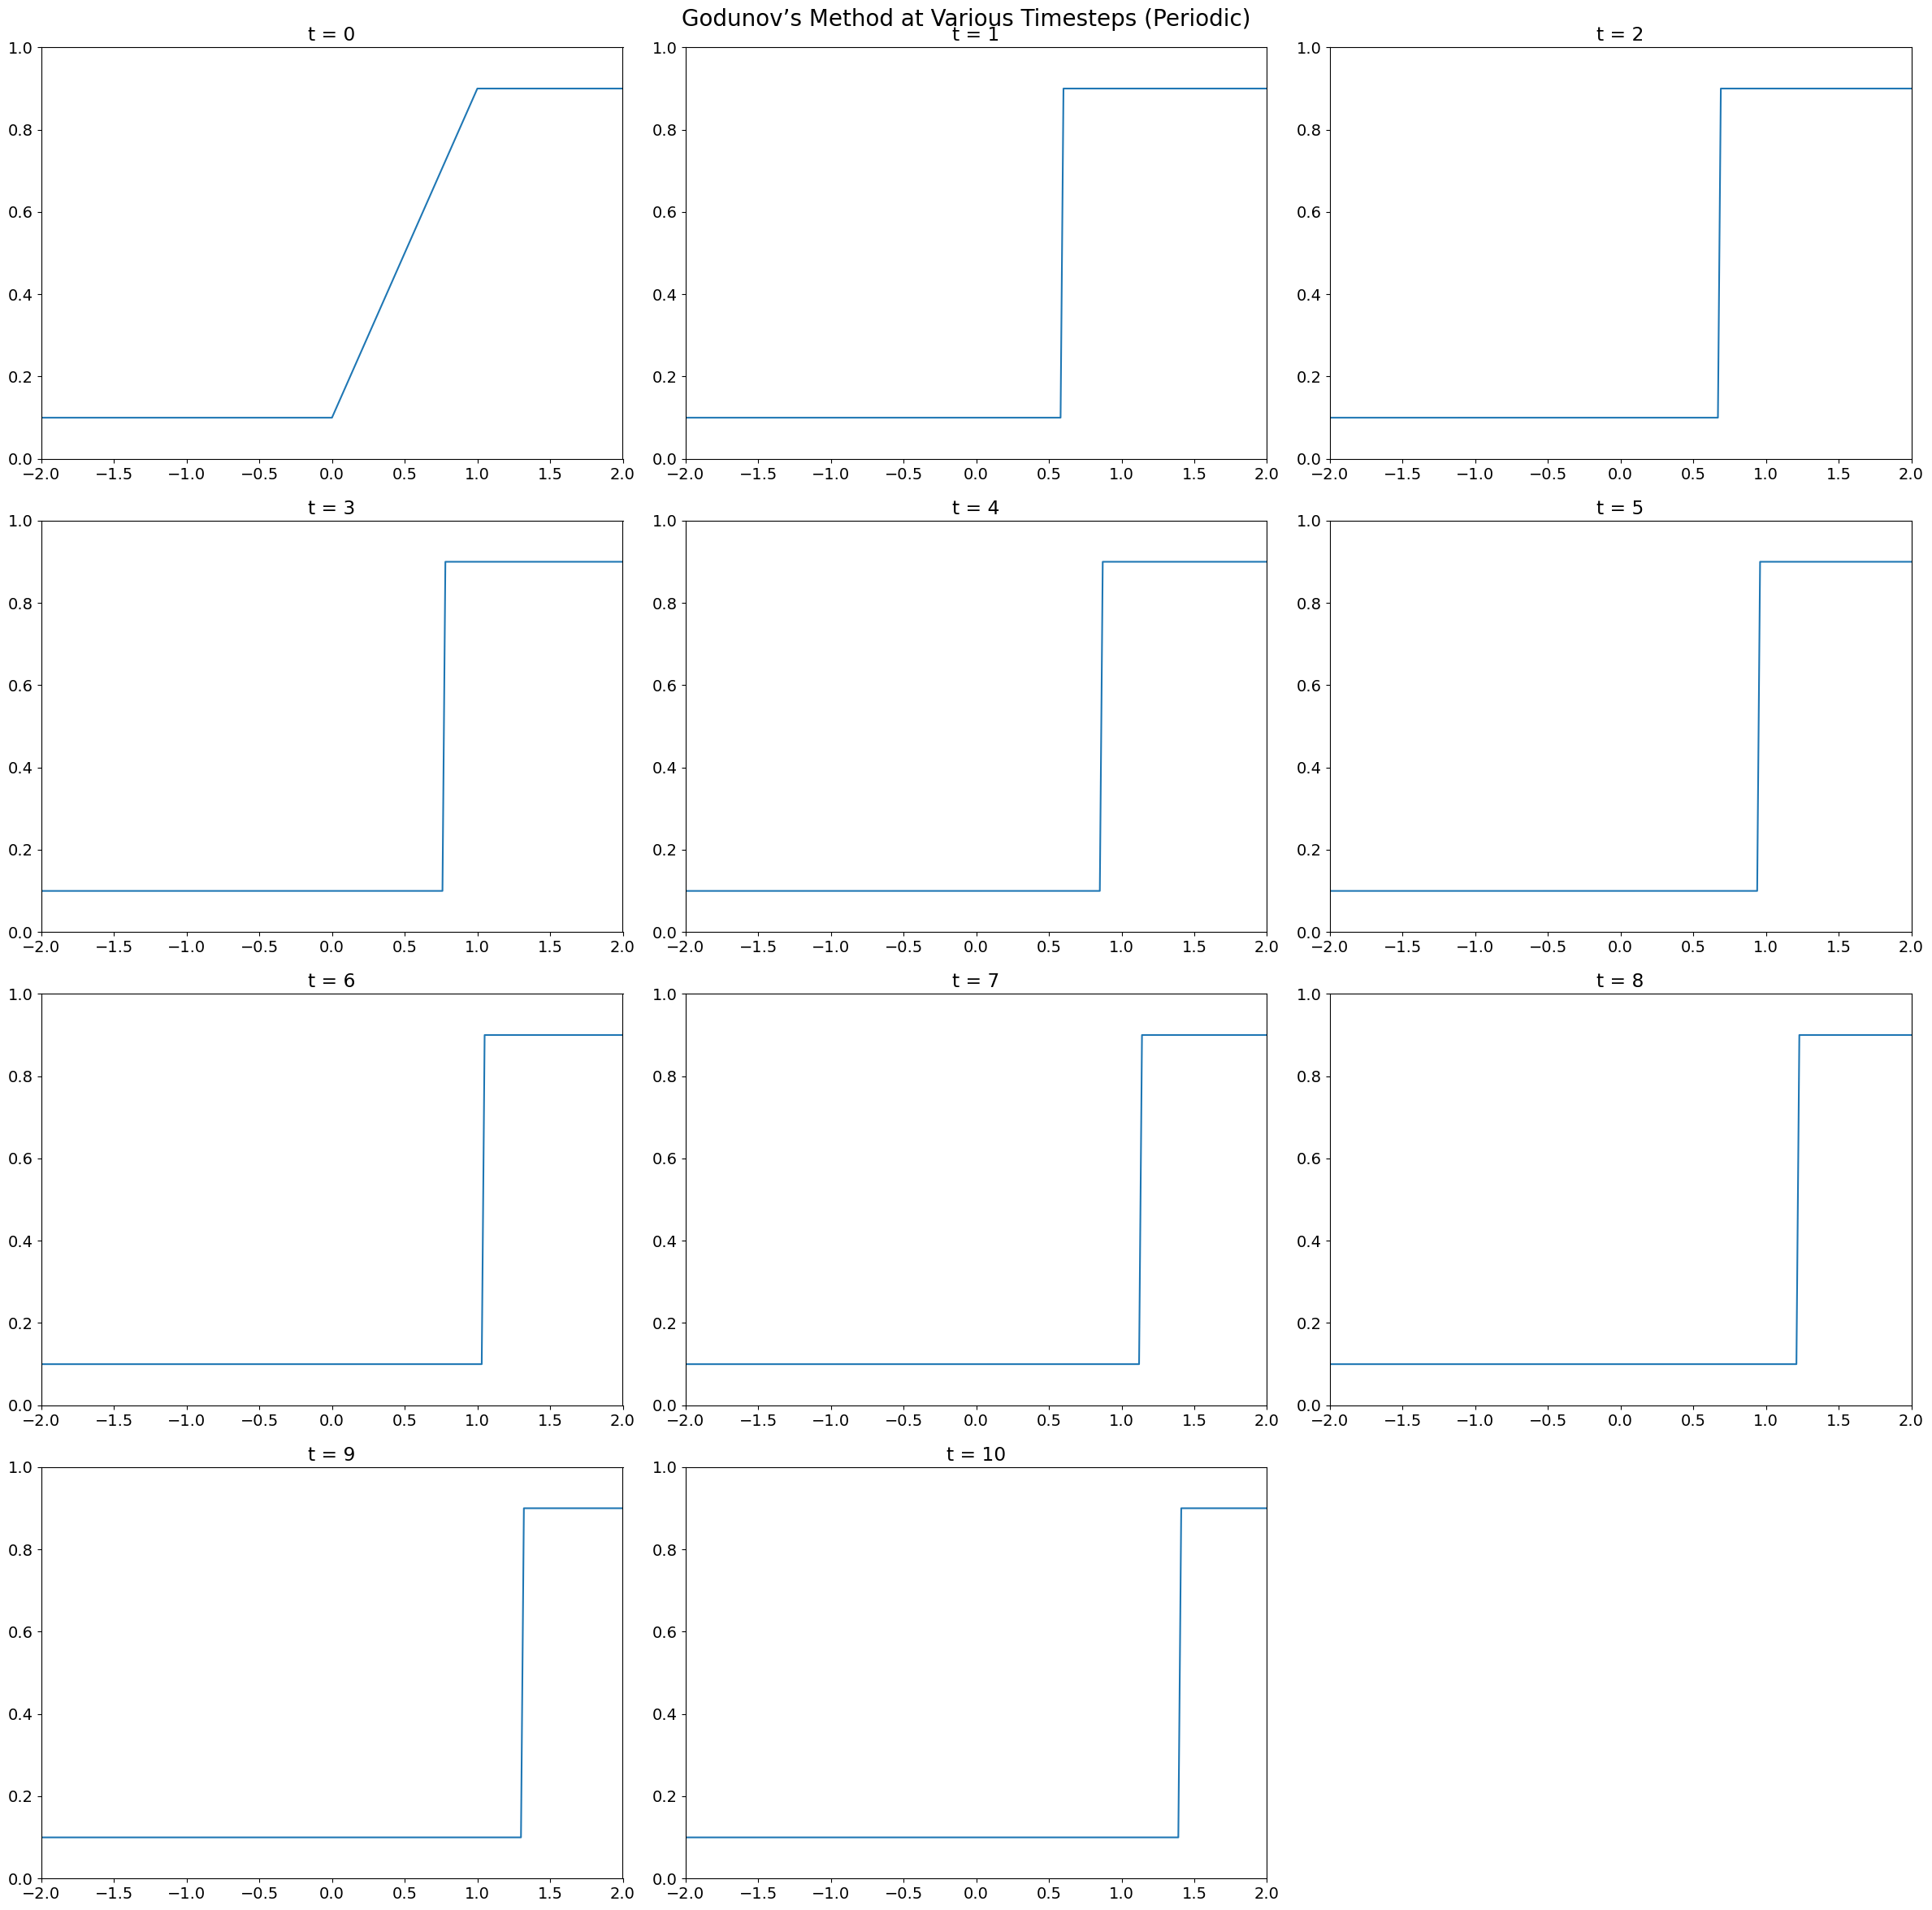

In [13]:
# initial
p0 = lambda x: 0.1*(x<0) + (0.1+0.8*x)*(x>=0)*(x<=1) + 0.9*(x>1)

h = .01
nu = 1/4
k = h*nu

x_values = np.around(np.arange(-2,2+h,h),decimals=3)
num_steps = round(10/k)

fig, ax = plt.subplots(4,3,figsize=(24,24))
plt.rcParams.update({'font.size': 14})

solution = Godunov(p0(x_values), nu, f, num_steps)

for i in range(11):
    index = round((i) * num_steps / 10)
    print("t =", i, df(solution[0, index]) > s and df(solution[-1, index]) < s)
    ax[i//3, i%3].plot(x_values, (solution[:, index]))
    ax[i//3, i%3].set_title("t = " + str(i))
    ax[i//3, i%3].set_xlim(-2,2)
    ax[i//3, i%3].set_ylim(0,1)

fig.delaxes(ax[3,2])

fig.suptitle("Godunov’s Method at Various Timesteps (Periodic)",fontsize=20)
plt.tight_layout()